In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
file = "googleplaystore.csv"
df = pd.read_csv(file, encoding = "utf8")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Clean data for analysis

In [228]:
print(df.shape)

(10841, 13)


In [229]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df.dropna(how ='any', inplace = True)
print(df.shape)

(9360, 13)


In [230]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head

<bound method NDFrame.head of                 Total  Percent
Android Ver         0      0.0
Current Ver         0      0.0
Last Updated        0      0.0
Genres              0      0.0
Content Rating      0      0.0
Price               0      0.0
Type                0      0.0
Installs            0      0.0
Size                0      0.0
Reviews             0      0.0
Rating              0      0.0
Category            0      0.0
App                 0      0.0>

In [231]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(8886, 13)


In [232]:
df = df.sort_values('Reviews', ascending=False)
df = df.drop_duplicates(subset='App', keep='first')
print(df.shape)

(8190, 13)


In [233]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df['Size'].replace('Varies with device', np.nan, inplace = True)

In [234]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].astype(int)

In [235]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [236]:
df['Price'].describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Including free apps, avg cost is 1.03

In [237]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up


In [238]:
df['Genres'].value_counts().tail()

Communication;Creativity              1
Puzzle;Education                      1
Strategy;Creativity                   1
Video Players & Editors;Creativity    1
Board;Pretend Play                    1
Name: Genres, dtype: int64

In [239]:
df['Genres'] = df['Genres'].str.split(';').str[0]
df['Genres'].value_counts().tail()

Casino           37
Trivia           28
Word             22
Music            21
Music & Audio     1
Name: Genres, dtype: int64

In [240]:
df['Genres'].replace('Music & Audio', 'Music', inplace = True)

In [241]:
df['Genres'].value_counts().tail()

Beauty    42
Casino    37
Trivia    28
Music     22
Word      22
Name: Genres, dtype: int64

## Free vs. Paid

Text(0.5, 1.0, 'Percent of Free Apps in Google Store')

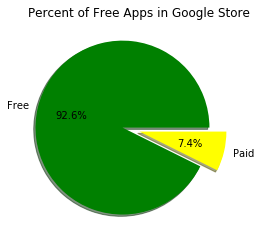

In [242]:
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["green","yellow"]
explode = (0.2,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Percent of Free Apps in Google Store')

In [243]:
x_axis = df['Installs']
y_axis = df['Rating']
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

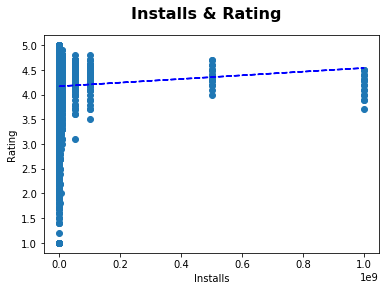

In [244]:
fig, ax = plt.subplots()

fig.suptitle("Installs & Rating", fontsize=16, fontweight="bold")

ax.set_xlabel("Installs")
ax.set_ylabel("Rating")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

## Calculate and add profit

In [245]:
df_p = df.loc[df['Type'] != 'Free']

df_p['Profit'] = df_p.Installs * df_p.Price

df_p.head()

C:\Users\shorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2490000.0
2170,Hactar Go,FAMILY,4.8,97,3.5M,1000,Paid,2.99,Everyone,Board,"March 30, 2018",2.4.15,4.0 and up,2990.0
10035,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,99000.0
8723,DRAGON QUEST,FAMILY,4.2,9659,30M,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,299000.0
4606,I Can't Wake Up!,TOOLS,4.7,963,3.7M,10000,Paid,2.99,Everyone,Tools,"May 25, 2018",3.4.0,4.0 and up,29900.0


## Free vs Not Free (taking out outliers, paid apps under 10.00)

In [246]:
paid_app = df_p.loc[df_p['Price'] < 10.00]

In [247]:
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2490000.0
2170,Hactar Go,FAMILY,4.8,97,3.5M,1000,Paid,2.99,Everyone,Board,"March 30, 2018",2.4.15,4.0 and up,2990.0
10035,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,99000.0
8723,DRAGON QUEST,FAMILY,4.2,9659,30M,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up,299000.0
4606,I Can't Wake Up!,TOOLS,4.7,963,3.7M,10000,Paid,2.99,Everyone,Tools,"May 25, 2018",3.4.0,4.0 and up,29900.0


In [248]:
free = df.loc[df['Type'] == 'Free']

##### Free app data frame by Genre

In [284]:
free_genre_installs = free.groupby("Genres")["Installs"].mean()
free_genre_count = free.groupby("Genres")["Installs"].count()
free_genre_df = pd.DataFrame({"Installs":free_genre_installs,"Count": free_genre_count})
free_genre_df = free_genre_df.sort_values("Installs",ascending=False)

free_genre_df.head()

,Installs,Count
Genres,,
Communication,4.696758e+07,235
Social,2.730266e+07,201
Video Players & Editors,2.696388e+07,146
Arcade,2.296812e+07,165
Productivity,2.046523e+07,283


#### Free apps by genre average installs

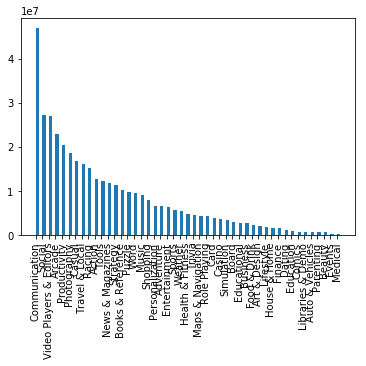

In [250]:
plt.bar(free_genre_df.index.values,free_genre_df.Installs, width = 0.5, align = 'edge')
plt.xticks(rotation=90);

##### Price Dataframe by Genre

In [283]:
price_genre_avg = paid_app.groupby(['Genres'])['Price'].mean()
price_genre_profit = paid_app.groupby(['Genres'])['Profit'].mean()
price_genre_install = paid_app.groupby(['Genres'])['Installs'].mean()
price_genre_count = paid_app.groupby(['Genres'])['Profit'].count()
genres = paid_app['Genres']
price_genre_df = pd.DataFrame({
                              'Average Price': price_genre_avg,
                              'Average Profit':price_genre_profit,
                              'Count':price_genre_count, 'Average Installs':price_genre_install})
price_genre_df.sort_values('Average Profit', ascending = False, inplace = True)

price_genre_df.head()

,Average Price,Average Profit,Count,Average Installs
Genres,,,,
Arcade,2.042632,3.783076e+06,19,607221.684211
Action,2.893846,1.189770e+06,26,656259.615385
Photography,3.737143,6.090043e+05,14,134108.571429
Weather,4.204286,5.971264e+05,7,115928.571429
Strategy,3.668571,5.189496e+05,14,149678.571429


## Average Installs for Apps< 10

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 <a list of 39 Text xticklabel objects>)

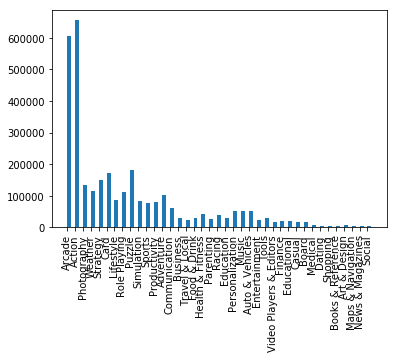

In [252]:
plt.bar(price_genre_df.index.values,price_genre_df["Average Installs"], width = 0.5, align = 'edge')
plt.xticks(rotation=90)

### Average Profit for Apps < 10

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 <a list of 39 Text xticklabel objects>)

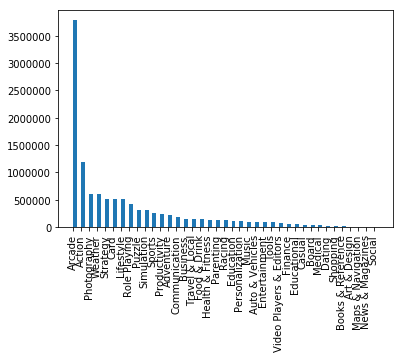

In [253]:
plt.bar(price_genre_df.index.values,price_genre_df["Average Profit"], width = 0.5, align = 'edge')
plt.xticks(rotation=90)

#### Mincraft & Fruit Ninja are bulk of Arcade profit

## Free and Not Free By Category

##### Free app Dataframe

In [292]:
free_cat_installs = free.groupby("Category")["Installs"].mean()
free_cat_count = free.groupby("Category")["Installs"].count()
free_cat_df = pd.DataFrame({"Installs":free_cat_installs,"Count": free_cat_count})
free_cat_df = free_cat_df.sort_values("Installs",ascending=False)

free_cat_df.head()

,Installs,Count
Category,,
COMMUNICATION,4.716616e+07,234
SOCIAL,2.730266e+07,201
VIDEO_PLAYERS,2.711535e+07,145
PRODUCTIVITY,2.046523e+07,283
PHOTOGRAPHY,1.873897e+07,248


#### Installs by Category for Free apps

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text xticklabel objects>)

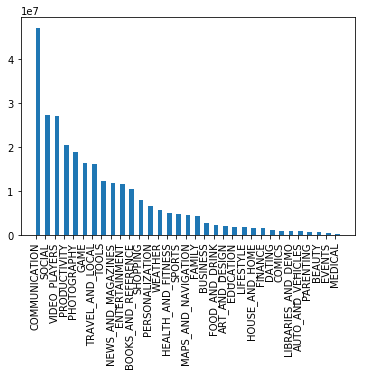

In [293]:
plt.bar(free_cat_df.index.values,free_cat_df.Installs, width = 0.5, align = 'edge')
plt.xticks(rotation=90)

### Installs by Category for Apps under 10

In [295]:
price_cat_avg = paid_app.groupby(['Category'])['Price'].mean()
price_cat_profit = paid_app.groupby(['Category'])['Profit'].mean()
price_cat_install = paid_app.groupby(['Category'])['Installs'].mean()
price_cat_count = paid_app.groupby(['Category'])['Profit'].count()

price_cat_df = pd.DataFrame({
                              'Average Price': price_cat_avg,
                              'Average Profit':price_cat_profit,
                              'Count':price_cat_count, 'Average Installs':price_cat_install})
price_cat_df.sort_values('Average Profit', ascending = False, inplace = True)

price_cat_df.head()

,Average Price,Average Profit,Count,Average Installs
Category,,,,
FAMILY,3.391022,739489.189781,137,151741.605839
PHOTOGRAPHY,3.737143,609004.271429,14,134108.571429
WEATHER,4.204286,597126.428571,7,115928.571429
GAME,3.128630,552556.724384,73,287385.780822
LIFESTYLE,3.577500,513929.950000,12,87259.166667


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text xticklabel objects>)

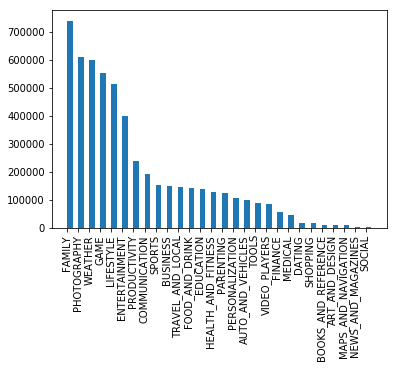

In [296]:
plt.bar(price_cat_df.index.values,price_cat_df["Average Profit"], width = 0.5, align = 'edge')
plt.xticks(rotation=90)

### FREE APPS looks like COMMUNICATION apps and PAID you want GAMES of all types

In [313]:
comm = free.loc[free['Category'] == 'COMMUNICATION']
comm = comm.sort_values('Installs', ascending = False)
comm.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.0,3419513,NaN,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,NaN,500000000,Free,0.0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,NaN,500000000,Free,0.0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
4676,Viber Messenger,COMMUNICATION,4.3,11335481,NaN,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up


In [316]:
arcade = paid_app.loc[paid_app['Genres'] == 'Arcade']
arcade = arcade.sort_values('Installs', ascending = False)
arcade.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
10682,Fruit Ninja Classic,GAME,4.3,85468,36M,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,990000.0
4554,R-TYPE,GAME,4.5,7687,23M,100000,Paid,1.99,Everyone,Arcade,"February 27, 2017",2.3.1,2.3.3 and up,199000.0
7610,Ski Safari: Adventure Time,FAMILY,4.5,48754,9.3M,100000,Paid,0.99,Everyone,Arcade,"October 7, 2014",1.5.2,2.3 and up,99000.0
5005,Mupen64Plus AE (N64 Emulator),GAME,4.2,4569,12M,100000,Paid,0.99,Everyone,Arcade,"January 19, 2014",2.4.4,2.0 and up,99000.0
9728,Sonic 4™ Episode I,GAME,3.7,8014,37M,100000,Paid,2.99,Everyone,Arcade,"April 4, 2016",1.5.0,2.2 and up,299000.0
4542,R-TYPE II,GAME,4.3,5682,37M,50000,Paid,1.99,Everyone,Arcade,"March 2, 2017",1.1.5,2.3.3 and up,99500.0
5224,AJ Jump: Animal Jam Kangaroos!,GAME,4.4,2975,42M,50000,Paid,1.99,Everyone,Arcade,"March 7, 2016",1.6,4.0 and up,99500.0
7196,PAC-MAN CE DX,GAME,4.5,1692,36M,10000,Paid,4.99,Everyone,Arcade,"April 23, 2018",1.1.0,4.0.3 and up,49900.0
7614,Rockstars of Ooo,FAMILY,3.4,642,26M,10000,Paid,1.99,Everyone 10+,Arcade,"August 11, 2015",1.0.2,2.3.3 and up,19900.0
